In [85]:
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.options.display.max_columns = None

In [5]:
# dtypes={'pop_id':'Int64','TIC':'string','gaiadr3_source_id':'string','epic_id':'string'}

In [6]:
# df=pd.read_csv('./makingtable/cleanedgaiadata.csv',dtype=dtypes)

In [7]:
# ourtable=df[df.source_table=='our table']
# nearbytable=df[df.source_table=='nearby table']

In [8]:
# plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
# plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color='deeppink')
# plt.gca().invert_yaxis()
# plt.xlim(0.7,1.9)
# plt.ylim(18,3)
# plt.ylabel(r'M$_G$ [mag]')
# plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
# plt.title('G absolute magnitude vs G-RP color')
# plt.show()

In [9]:
# coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score':'Int64','Flare':'Int64',
#           'Shelf':'Int64','Evolution':'Int64','Score.1':'Int64','Flare.1':'Int64','Shelf.1':'Int64','Evolution.1':'Int64'}

In [10]:
# lctable=pd.read_csv('lightcurvescores.csv',header=1,dtype=coltypes)

In [11]:
# lctable.rename(columns={'author_x':'LC_author','author_y':'paper_author','Score':'Score1','Flare':'Flare1',
#                         'Shelf':'Shelf1','Evolution':'Evolution1','Notes':'Notes1','Score.1':'Score2',
#                         'Flare.1':'Flare2','Shelf.1':'Shelf2','Evolution.1':'Evolution2','Notes.1':'Notes2'},inplace=True)

In [12]:
# lctable.drop(['calc_per','complex_status'],axis=1,inplace=True)

In [13]:
# lctable1=lctable[['pop_id','lcname','idtype','ID','secorcamp','LC_author','cadence','fluxamplitude',
#                  'TIC','gaiadr3_source_id','epic_id','per','group','age_Myr','disco_paper',
#                  'paper_author','year','Score1','Flare1','Shelf1','Evolution1','Notes1']]
# lctable2=lctable[['pop_id','lcname','idtype','ID','secorcamp','LC_author','cadence','fluxamplitude',
#                  'TIC','gaiadr3_source_id','epic_id','per2','group','age_Myr','disco_paper',
#                  'paper_author','year','Score2','Flare2','Shelf2','Evolution2','Notes2']]
# lctable1['per_col']='one'
# lctable2['per_col']='two'
# lctable1.dropna(subset=['Score1'],inplace=True)
# lctable2.dropna(subset=['Score2'],inplace=True)
# lctable1.rename(columns={'Score1':'Score','Flare1':'Flare','Shelf1':'Shelf',
#                          'Evolution1':'Evolution','Notes1':'Notes'},inplace=True)
# lctable2.rename(columns={'per2':'per','Score2':'Score','Flare2':'Flare','Shelf2':'Shelf',
#                          'Evolution2':'Evolution','Notes2':'Notes'},inplace=True)
# lctablecomb=pd.concat([lctable1,lctable2],ignore_index=True)

In [14]:
#lctablecomb[lctablecomb.pop_id==1]

In [15]:
#lctablecombfilt=lctablecomb[lctablecomb.Score!=9]

In [16]:
#lctablecombfilt[lctablecombfilt.pop_id==1]

In [17]:
#lctablecombfilt.to_csv('lcscoresreformat.csv',index=False)

In [18]:
# coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score':'Int64','Flare':'Int64',
#           'Shelf':'Int64','Evolution':'Int64'}

In [19]:
# lctable=pd.read_csv('lcscoresreformat.csv',dtype=coltypes)

In [20]:
# lctable[lctable.pop_id==1]

In [21]:
# def scorestr(scoreseries):
#     scorearray=scoreseries.to_numpy()
#     scorestr=''
#     for score in scorearray:
#         scorestr+=str(score)+' '
#     return scorestr

In [22]:
# def iscomplex(scoreseries):
#     scores=scoreseries.to_numpy()
#     return np.any(np.isin(scores, [1,2]))

In [23]:
# def hasflare(flareseries):
#     flares=flareseries.to_numpy()
#     if np.any(np.isin(flares, [2])):
#         return 'big flare'
#     if np.any(np.isin(flares, [1])):
#         return 'regular flare'
#     return 'no flare'

In [24]:
# def hasshelf(shelfseries):
#     shelves=shelfseries.to_numpy()
#     return np.any(np.isin(shelves, [1]))

In [25]:
# grouped=lctable.groupby(['pop_id']).agg(scoreagg=('Score',iscomplex),
#                                                   scorelist=('Score',scorestr)).reset_index()

In [26]:
# grouped=lctable.groupby(['pop_id']).agg(iscomplex=('Score',iscomplex),
#                                        flareagg=('Flare',hasflare),
#                                        hasshelf=('Shelf',hasshelf),
#                                        hasevolution=('Evolution',hasshelf),
#                                        avg_amplitude=('fluxamplitude','mean')).reset_index()

In [27]:
# grouped.head(10)

In [28]:
# merged=pd.merge(grouped, df, on="pop_id", how="outer")

In [29]:
# merged.to_csv('lcscoreswgaia.csv',index=False)

In [30]:
dtypes={'pop_id':'Int64','TIC':'string','gaiadr3_source_id':'string','epic_id':'string'}

In [31]:
df=pd.read_csv('lcscoreswgaia.csv',dtype=dtypes)

In [32]:
ourtable=df[df.source_table=='our table']
nearbytable=df[df.source_table=='nearby table']

In [33]:
ourtable.head(10)

,pop_id,iscomplex,flareagg,hasshelf,hasevolution,avg_amplitude,TIC,gaiadr3_source_id,epic_id,per,per2,group,age_Myr,disco_paper,author,year,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,nearbyids_oid,GaiaEDR3,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g,source_table,g_erroverflux,bp_erroverflux,rp_erroverflux
0,0,1.0,big flare,1.0,1.0,0.055294,59129133,3392549449695395968,246676629,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018.0,1.636148e+18,Gaia DR3 3392549449695395968,3.392549e+18,8.915612e+08,2016.0,74.868432,0.111448,14.273220,0.073369,6.345332,0.123571,51.349617,20.650896,9.782701,0.145434,-18.186762,0.111691,0.051954,-0.050209,-0.191040,0.311841,-0.336029,0.209831,-0.080116,0.088596,-0.050038,0.063916,273.0,0.0,267.0,6.0,100.504940,1.557492e+04,0.873336,379.500430,31.0,False,1.249483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,16.0,0.203500,31.0,10.0,0.0,0.061194,94.721010,2.0,0.0,7.779637,0.221644,0.425816,0.324400,0.367743,-78.520400,-10.462833,-32.753910,40.739166,False,252.0,45288.319681,72.015495,628.86910,14.047401,28.0,7331.629218,56.008920,130.901110,15.675541,28.0,60414.265001,354.256350,170.538270,12.795047,1.495880,0.0,1.0,0.0,1.0,0.0,2.880494,1.628140,1.252355,12.816790,4.137138,2.0,17.0,7.0,11.0,15.554990,NaN,NaN,914.81240,NaN,3600.0,4.5,0.50,1

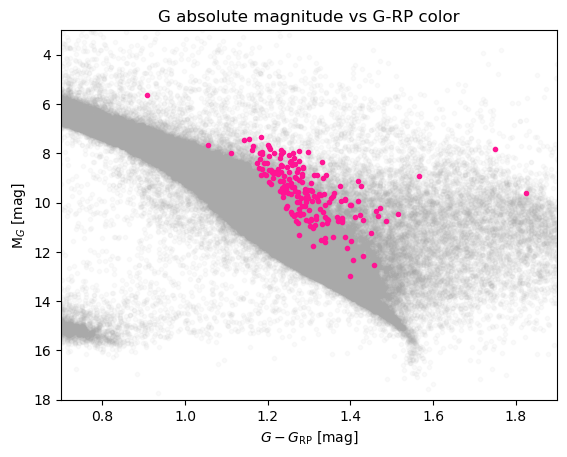

In [34]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color='deeppink')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

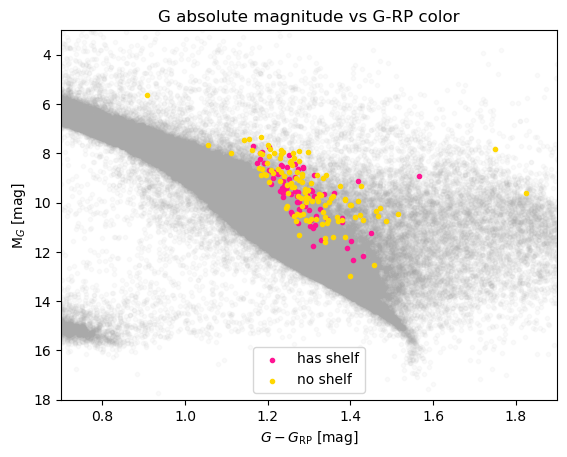

In [35]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.hasshelf==1].abs_g_rp,ourtable[ourtable.hasshelf==1].g_absmag,
            marker='.',color='deeppink',label='has shelf')
plt.scatter(ourtable[ourtable.hasshelf==0].abs_g_rp,ourtable[ourtable.hasshelf==0].g_absmag,
            marker='.',color='gold',label='no shelf')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

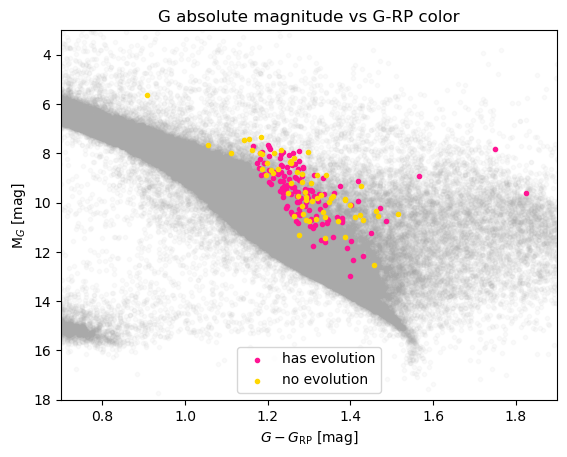

In [36]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.hasevolution==1].abs_g_rp,ourtable[ourtable.hasevolution==1].g_absmag,
            marker='.',color='deeppink',label='has evolution')
plt.scatter(ourtable[ourtable.hasevolution==0].abs_g_rp,ourtable[ourtable.hasevolution==0].g_absmag,
            marker='.',color='gold',label='no evolution')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.savefig('CMDwithevolution.png')
plt.show()

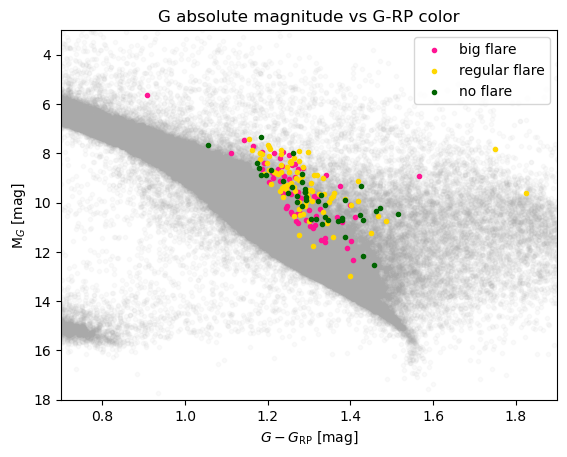

In [37]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.flareagg=='big flare'].abs_g_rp,ourtable[ourtable.flareagg=='big flare'].g_absmag,
            marker='.',color='deeppink',label='big flare')
plt.scatter(ourtable[ourtable.flareagg=='regular flare'].abs_g_rp,ourtable[ourtable.flareagg=='regular flare'].g_absmag,
            marker='.',color='gold',label='regular flare')
plt.scatter(ourtable[ourtable.flareagg=='no flare'].abs_g_rp,ourtable[ourtable.flareagg=='no flare'].g_absmag,
            marker='.',color='darkgreen',label='no flare')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

In [91]:
ourtable[ourtable.avg_amplitude>0.35]
#need to filter out this wacky one which is due to pretty garbage data on an FFI light curve
#and there are only two so it screws with the average

,pop_id,iscomplex,flareagg,hasshelf,hasevolution,avg_amplitude,TIC,gaiadr3_source_id,epic_id,per,per2,group,age_Myr,disco_paper,author,year,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,nearbyids_oid,GaiaEDR3,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g,source_table,g_erroverflux,bp_erroverflux,rp_erroverflux
17,17,1.0,no flare,0.0,0.0,0.421891,49198167,6242649340270424704,204367193,0.4835,NaN,Upper Scorpius,10.0,Stauffer_2017,Stauffer,2017.0,1.636148e+18,Gaia DR3 6242649340270424704,6.242649e+18,1.329658e+09,2016.0,242.976608,0.234705,-22.613758,0.166059,7.012483,0.249745,28.078571,24.061491,-10.940454,0.279009,-21.430394,0.24067,-0.535985,0.222086,0.117942,-0.539281,-0.253497,-0.337513,0.635275,-0.320868,-0.15449,-0.36024,234.0,0.0,234.0,0.0,0.372481,327.01453,0.618253,2.192457,95.0,False,NaN,1.121277,0.042927,-0.234659,0.21776,-0.198971,-0.122111,0.150634,27.0,14.0,0.446,30.0,11.0,0.0,0.026756,58.035576,0.0,0.0,1.016023,0.16589,0.478408,0.211455,0.353033,-65.45952,16.934141,-16.189299,-40.286915,False,251.0,908.450585,2.921543,310.94885,18.291615,22.0,56.302477,6.018529,9.354857,20.962223,27.0,1465.057037,13.920673,105.243256,16.83326,1.674675,0.0,0.0,0.0,0.0,0.0,4.128964,2.670609,1.458355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [93]:
amptable=ourtable[ourtable.avg_amplitude<0.35]

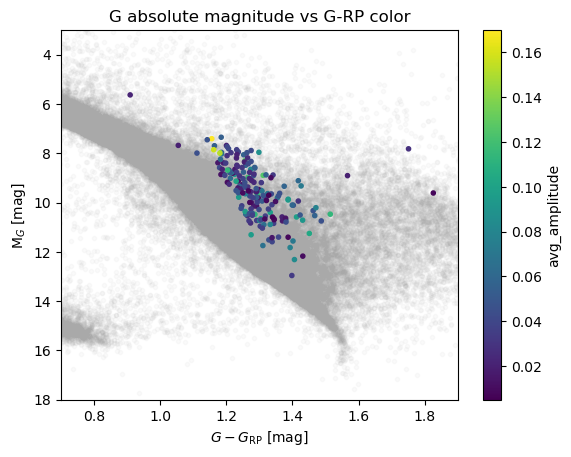

In [95]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(amptable.abs_g_rp,amptable.g_absmag,marker='.',c=amptable.avg_amplitude)
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel('avg_amplitude')
plt.show()

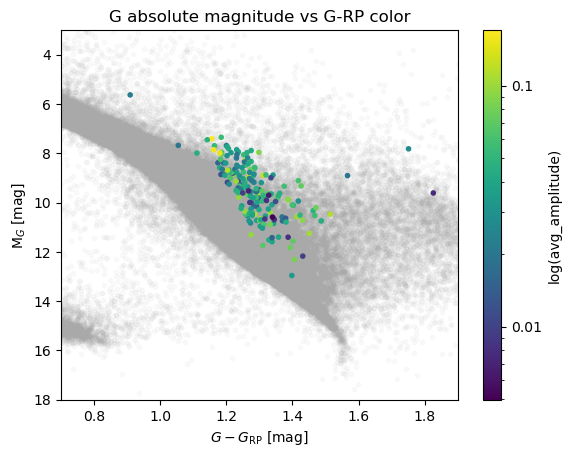

In [97]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(amptable.abs_g_rp,amptable.g_absmag,marker='.',c=amptable.avg_amplitude,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel('log(avg_amplitude)')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}'))
plt.show()